NAMA ANGGOTA KELOMPOK:
1. MOZAIK AL QHAROMI
2. LALU MUTAWALLI
3. ISLAMUL HADI
4. ST. TUHPATUSANIA
5. MUKASYAFATUL ASROR


In [1]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk

In [2]:
text = open('Text_Output.txt', 'r').read()
text

'=========================================================================\n                          ARTIKEL FOOTBALL                                 \n=========================================================================\n\n=================================\nPrinting Summary = 1\n=================================\n[\'Wayne Rooney made a winning return to Everton as Manchester United cruised into the FA Cup quarter-finals.\', \'Rooney received a hostile reception, but goals in each half from Quinton Fortune and Cristiano Ronaldo silenced the jeers at Goodison Park.\', "Fortune headed home after 23 minutes before Ronaldo scored when Nigel Martyn parried Paul Scholes\' free-kick.", "Marcus Bent missed Everton\'s best chance when Roy Carroll, who was later struck by a missile, saved at his feet.", "Fortune gave United the lead after 23 minutes, rising to meet Ronaldo\'s cross from eight yards after the Portuguese youngster had been allowed too much time and space by the hapless Gary 

In [3]:
def get_summary(text, pct):
    summary = summarize(text, ratio=pct, split=True)
    return summary

In [4]:
def get_keywords(text):
    res = keywords(
        text, ratio=0.1, 
        words=None, 
        split=False, 
        scores=False, 
        pos_filter=('NN', 'JJ'), 
        lemmatize=False, 
        deacc=False)
    
    res = res.split("\n")
    return res

In [5]:
print("The Input Text")
print("===============================================")
print(text)
print("--------------------------" )

The Input Text
                          ARTIKEL FOOTBALL                                 

Printing Summary = 1
['Wayne Rooney made a winning return to Everton as Manchester United cruised into the FA Cup quarter-finals.', 'Rooney received a hostile reception, but goals in each half from Quinton Fortune and Cristiano Ronaldo silenced the jeers at Goodison Park.', "Fortune headed home after 23 minutes before Ronaldo scored when Nigel Martyn parried Paul Scholes' free-kick.", "Marcus Bent missed Everton's best chance when Roy Carroll, who was later struck by a missile, saved at his feet.", "Fortune gave United the lead after 23 minutes, rising to meet Ronaldo's cross from eight yards after the Portuguese youngster had been allowed too much time and space by the hapless Gary Naysmith.", "United almost doubled their lead after 48 minutes when Ronaldo's low drive from 25 yards took a deflection off Tony Hibbert, but Martyn dived to save brilliantly.", "Scholes' free-kick took a deflection,

In [6]:
print("Printing Summary")
print(get_summary(text, 0.3))
print('Printing Keywords')

Printing Summary
['[\'Wayne Rooney made a winning return to Everton as Manchester United cruised into the FA Cup quarter-finals.\', \'Rooney received a hostile reception, but goals in each half from Quinton Fortune and Cristiano Ronaldo silenced the jeers at Goodison Park.\', "Fortune headed home after 23 minutes before Ronaldo scored when Nigel Martyn parried Paul Scholes\' free-kick.", "Marcus Bent missed Everton\'s best chance when Roy Carroll, who was later struck by a missile, saved at his feet.", "Fortune gave United the lead after 23 minutes, rising to meet Ronaldo\'s cross from eight yards after the Portuguese youngster had been allowed too much time and space by the hapless Gary Naysmith.", "United almost doubled their lead after 48 minutes when Ronaldo\'s low drive from 25 yards took a deflection off Tony Hibbert, but Martyn dived to save brilliantly.", "Scholes\' free-kick took a deflection, and Martyn could only parry the ball out for Ronaldo, who reacted first to score eas

In [7]:
print(get_keywords(text))

['printing', 'keywords', 'summary', 'said', 'england', 'captain', 'half', 'games', 'game', 'world', 'worlds', 'opening', 'opens', 'seeded', 'seed', 'ball', 'balls', 'international', 'internationals', 'ireland', 'play', 'played', 'playing', 'plays', 'injury', 'injuries', 'united', 'rooney', 'open champion', 'coach', 'coaches', 'coaching', 'ronaldo', 'minutes', 'minute', 'indoor', 'indoors', 'seconds', 'second', 'kicking', 'kick', 'kicked', 'beat', 'beating', 'great', 'william', 'williams', 'players', 'player', 'board', 'boards', 'final', 'champions', 'match', 'matches', 'matched', 'olympic', 'olympics', 'trying', 'try', 'team', 'teams', 'new', 'news', 'chelsea defender', 'biarritz', 'star', 'stars', 'robinson', 'set', 'sets', 'setting', 'gallas', 'mido', 'run', 'runs', 'neville', 'mark', 'scholes', 'pakistan', 'fortune', 'yachvili', 'cup', 'pietersen', 'defended', 'defending', 'wicket', 'wickets', 'martyn', 'volley', 'volleyed', 'despite', 'saved', 'save', 'saving', 'michael', 'liverpoo

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

list(sent_to_words(get_summary(text, 0.3)))

[['wayne',
  'rooney',
  'made',
  'winning',
  'return',
  'to',
  'everton',
  'as',
  'manchester',
  'united',
  'cruised',
  'into',
  'the',
  'fa',
  'cup',
  'quarter',
  'finals',
  'rooney',
  'received',
  'hostile',
  'reception',
  'but',
  'goals',
  'in',
  'each',
  'half',
  'from',
  'quinton',
  'fortune',
  'and',
  'cristiano',
  'ronaldo',
  'silenced',
  'the',
  'jeers',
  'at',
  'goodison',
  'park',
  'fortune',
  'headed',
  'home',
  'after',
  'minutes',
  'before',
  'ronaldo',
  'scored',
  'when',
  'nigel',
  'martyn',
  'parried',
  'paul',
  'scholes',
  'free',
  'kick',
  'marcus',
  'bent',
  'missed',
  'everton',
  'best',
  'chance',
  'when',
  'roy',
  'carroll',
  'who',
  'was',
  'later',
  'struck',
  'by',
  'missile',
  'saved',
  'at',
  'his',
  'feet',
  'fortune',
  'gave',
  'united',
  'the',
  'lead',
  'after',
  'minutes',
  'rising',
  'to',
  'meet',
  'ronaldo',
  'cross',
  'from',
  'eight',
  'yards',
  'after',
  'the',


In [9]:
import re
text_baru = re.sub('[^ a-zA-Z0-9]', '' , text)
print(text_baru)

                          ARTIKEL FOOTBALL                                 Printing Summary  1Wayne Rooney made a winning return to Everton as Manchester United cruised into the FA Cup quarterfinals Rooney received a hostile reception but goals in each half from Quinton Fortune and Cristiano Ronaldo silenced the jeers at Goodison Park Fortune headed home after 23 minutes before Ronaldo scored when Nigel Martyn parried Paul Scholes freekick Marcus Bent missed Evertons best chance when Roy Carroll who was later struck by a missile saved at his feet Fortune gave United the lead after 23 minutes rising to meet Ronaldos cross from eight yards after the Portuguese youngster had been allowed too much time and space by the hapless Gary Naysmith United almost doubled their lead after 48 minutes when Ronaldos low drive from 25 yards took a deflection off Tony Hibbert but Martyn dived to save brilliantly Scholes freekick took a deflection and Martyn could only parry the ball out for Ronaldo who r

In [10]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(text_baru)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

print(normalized)

ARTIKEL FOOTBALL Printing Summary 1Wayne Rooney made winning return Everton Manchester United cruised FA Cup quarterfinal Rooney received hostile reception goal half Quinton Fortune Cristiano Ronaldo silenced jeer Goodison Park Fortune headed home 23 minute Ronaldo scored Nigel Martyn parried Paul Scholes freekick Marcus Bent missed Evertons best chance Roy Carroll later struck missile saved foot Fortune gave United lead 23 minute rising meet Ronaldos cross eight yard Portuguese youngster allowed much time space hapless Gary Naysmith United almost doubled lead 48 minute Ronaldos low drive 25 yard took deflection Tony Hibbert Martyn dived save brilliantly Scholes freekick took deflection Martyn could parry ball Ronaldo reacted first score easily Manchester United Carroll Gary Neville Brown Ferdinand Heinze Ronaldo Phil Neville Keane Scholes Fortune RooneyPrinting Keywords 1united ronaldo martyn everton fortune rooney carroll bent scholes player player mcfadden arteta gary sub neville na

In [11]:
from nltk import ngrams
n = 2
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [12]:
print(total_grams[:100])

[('ARTIKEL', 'FOOTBALL'), ('FOOTBALL', 'Printing'), ('Printing', 'Summary'), ('Summary', '1Wayne'), ('1Wayne', 'Rooney'), ('Rooney', 'made'), ('made', 'winning'), ('winning', 'return'), ('return', 'Everton'), ('Everton', 'Manchester'), ('Manchester', 'United'), ('United', 'cruised'), ('cruised', 'FA'), ('FA', 'Cup'), ('Cup', 'quarterfinal'), ('quarterfinal', 'Rooney'), ('Rooney', 'received'), ('received', 'hostile'), ('hostile', 'reception'), ('reception', 'goal'), ('goal', 'half'), ('half', 'Quinton'), ('Quinton', 'Fortune'), ('Fortune', 'Cristiano'), ('Cristiano', 'Ronaldo'), ('Ronaldo', 'silenced'), ('silenced', 'jeer'), ('jeer', 'Goodison'), ('Goodison', 'Park'), ('Park', 'Fortune'), ('Fortune', 'headed'), ('headed', 'home'), ('home', '23'), ('23', 'minute'), ('minute', 'Ronaldo'), ('Ronaldo', 'scored'), ('scored', 'Nigel'), ('Nigel', 'Martyn'), ('Martyn', 'parried'), ('parried', 'Paul'), ('Paul', 'Scholes'), ('Scholes', 'freekick'), ('freekick', 'Marcus'), ('Marcus', 'Bent'), ('Be

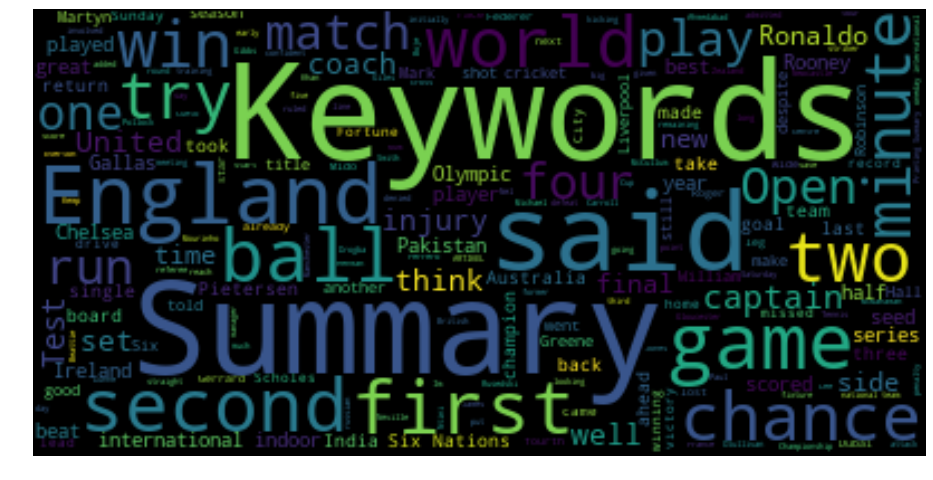

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

ARTIKEL was found 5 times
Printing was found 5 times
Summary was found 50 times
Rooney was found 7 times
made was found 7 times
winning was found 6 times
return was found 8 times
Manchester was found 4 times
United was found 11 times
Cup was found 6 times
goal was found 9 times
half was found 10 times
Fortune was found 5 times
Ronaldo was found 7 times
home was found 4 times
minute was found 17 times
scored was found 9 times
Martyn was found 5 times
Paul was found 4 times
Scholes was found 4 times
missed was found 6 times
best was found 9 times
chance was found 18 times
lead was found 6 times
cross was found 4 times
much was found 4 times
time was found 10 times
Gary was found 4 times
drive was found 6 times
took was found 8 times
save was found 4 times
could was found 10 times
ball was found 21 times
first was found 21 times
score was found 4 times
Neville was found 5 times
Keywords was found 50 times
player was found 10 times
striker was found 4 times
make was found 7 times
injury wa

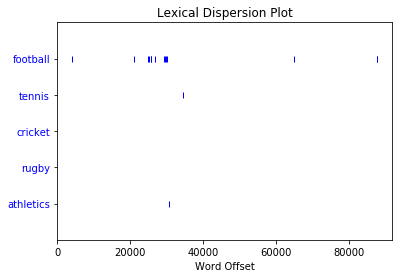

In [26]:
#from nltk.book import text5 as content
#plt.figure(figsize=(16,5))
#topics = ['Everton', 'Ronaldo','ball','game','Carrol','strike','after',"final"]
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import brown
brown.categories()
topics = ["football","tennis","cricket","rugby","athletics"]
dispersion_plot(brown.words(categories='news'), topics)

In [27]:
def sent_to_word(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


In [33]:
import gensim
from gensim import corpora
tokenized_sent = list(sent_to_word(filtered_sentence))
dictionary = corpora.Dictionary(tokenized_sent)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sent]
doc_term_matrix


[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(5, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(22, 1)],
 [(29, 1)],
 [(30, 1)],
 [],
 [(31, 1)],
 [(24, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(37, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(22, 1)],
 [(52, 1)],
 [(11, 1)],
 [(53, 1)],
 [],
 [(31, 1)],
 [(54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(59, 1)],
 [(60, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(68, 1)],
 [(11, 1)],
 [(69, 1)],
 [(70, 1)],
 [(53, 1)],
 [],
 [(31, 1)],
 [(56, 1)],
 [(71, 1)],
 [(72, 1)],


In [37]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word=dictionary, passes=100)


In [41]:
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.017*"summary" + 0.015*"the" + 0.014*"im" + 0.014*"medallists" + 0.013*"world" + 0.013*"international" + 0.011*"seconds" + 0.011*"best" + 0.010*"jason" + 0.010*"finished" + 0.009*"olympics" + 0.009*"sure" + 0.009*"said" + 0.008*"one" + 0.007*"new" + 0.007*"games" + 0.007*"champion" + 0.006*"england" + 0.006*"next" + 0.006*"home"'), (1, '0.024*"olympic" + 0.018*"keywords" + 0.017*"indoor" + 0.012*"gardener" + 0.012*"meeting" + 0.011*"win" + 0.010*"mark" + 0.008*"gold" + 0.008*"womens" + 0.008*"lewisfrancis" + 0.008*"jump" + 0.008*"athens" + 0.006*"final" + 0.006*"set" + 0.005*"last" + 0.005*"shot" + 0.005*"record" + 0.005*"season" + 0.005*"british" + 0.005*"looking"')]


In [44]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))
coherence_model_lda=CoherenceModel(
    model=ldamodel, 
    texts=tokenized_sent,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score ", coherence_lda)


Perplexity:  -7.976099528015005

Coherence Score  0.8582528016831118


In [46]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.156784  0.0       1        1  56.221199
0     -0.156784  0.0       2        1  43.778793, topic_info=     Category       Freq           Term      Total  loglift  logprob
1497  Default  52.000000        olympic  52.000000  30.0000  30.0000
3     Default  29.000000        summary  29.000000  29.0000  29.0000
94    Default  39.000000       keywords  39.000000  28.0000  28.0000
114   Default  26.000000            the  26.000000  27.0000  27.0000
660   Default  36.000000         indoor  36.000000  26.0000  26.0000
217   Default  24.000000             im  24.000000  25.0000  25.0000
1638  Default  23.000000     medallists  23.000000  24.0000  24.0000
221   Default  22.000000          world  22.000000  23.0000  23.0000
239   Default  21.000000  international  21.000000  22.0000  22.0000
453   Default  19.000000        seconds  19.000000  21.0000  21.0000
43    Default  19.000000           best  19.000000  20.0000  20.0000
1603  Default  26.000000       gardener  26.000000  19.0000  19.0000
1607  Default  26.000000        meeting  26.000000  18.0000  18.0000
823   Default  16.000000          jason  16.000000  17.0000  17.0000
783   Default  16.000000       finished  16.000000  16.0000  16.0000
1616  Default  15.000000       olympics  15.000000  15.0000  15.0000
1639  Default  15.000000           sure  15.000000  14.0000  14.0000
333   Default  23.000000            win  23.000000  13.0000  13.0000
146   Default  15.000000           said  15.000000  12.0000  12.0000
957   Default  21.000000           mark  21.000000  11.0000  11.0000
165   Default  13.000000            one  13.000000  10.0000  10.0000
209   Default  12.000000            new  12.000000   9.0000   9.0000
1513  Default  18.000000           gold  18.000000   8.0000   8.0000
123   Default  11.000000          games  11.000000   7.0000   7.0000
1517  Default  17.000000   lewisfrancis  17.000000   6.0000   6.0000
1547  Default  17.000000         womens  17.000000   5.0000   5.0000
1498  Default  17.000000         athens  17.000000   4.0000   4.0000
1592  Default  17.000000           jump  17.000000   3.0000   3.0000
586   Default  11.000000       champion  11.000000   2.0000   2.0000
261   Default  11.000000        england  11.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
3      Topic2  29.252237        summary  29.623730   0.8134  -4.0486
114    Topic2  25.690651            the  26.062788   0.8116  -4.1785
217    Topic2  24.141165             im  24.514887   0.8107  -4.2407
1638   Topic2  23.271429     medallists  23.645395   0.8101  -4.2774
221    Topic2  22.578289          world  22.950655   0.8097  -4.3076
239    Topic2  21.434509  international  21.807173   0.8088  -4.3596
453    Topic2  18.779671        seconds  19.152769   0.8063  -4.4918
43     Topic2  18.641985           best  19.014971   0.8062  -4.4992
823    Topic2  16.490583          jason  16.864220   0.8036  -4.6218
783    Topic2  16.490583       finished  16.864220   0.8036  -4.6218
1616   Topic2  15.620743       olympics  15.994737   0.8024  -4.6760
1639   Topic2  15.620743           sure  15.994737   0.8024  -4.6760
146    Topic2  14.645560           said  15.017072   0.8010  -4.7405
165    Topic2  13.508951            one  13.880898   0.7989  -4.8212
209    Topic2  12.456825            new  12.829288   0.7966  -4.9023
123    Topic2  11.403706          games  11.776066   0.7939  -4.9907
586    Topic2  10.945907       champion  11.318355   0.7926  -5.0316
261    Topic2  10.893271        england  11.265096   0.7925  -5.0365
415    Topic2  10.122038           next  10.494800   0.7899  -5.1099
30     Topic2  10.030239           home  10.402936   0.7895  -5.1190
299    Topic2   9.710063           star  10.083026   0.7883  -5.1514
636    Topic2   9.710064          third  10.083027   0.7883  -5.1514
497    Topic2   8.840135           